# Polynomial Regression: extending linear models with basis functions

[link](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

With this re-labeling of the data, our problem can be written

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

We see that the resulting polynomial regression is in the same class of linear models we’d considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline
import pandas as pd

$$y = X^3 + 100 + \epsilon$$

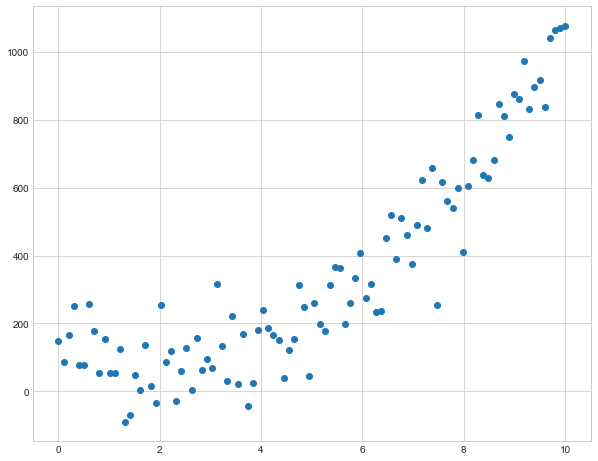

In [6]:
np.random.seed(42)
n_samples = 100

X = np.linspace(0, 10, 100)
rng = np.random.randn(n_samples) * 100

y = X ** 3 + rng + 100

plt.figure(figsize=(10,8));
plt.scatter(X, y);

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Linear Regression

0.764339457493


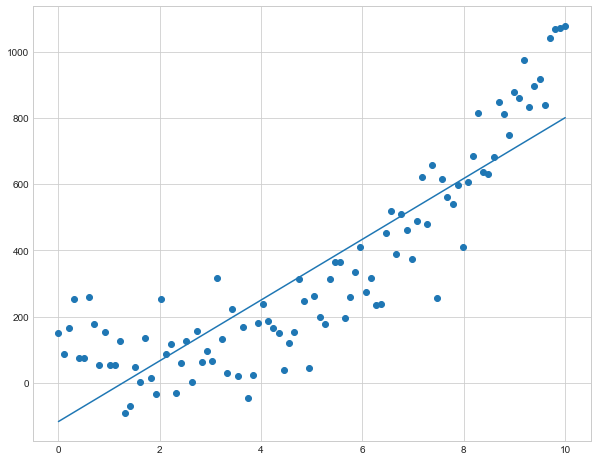

In [8]:
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
model_pred = lr.predict(X.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, model_pred);
print(r2_score(y, model_pred))

## Polynomial

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))

In [29]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1, 1))
y_pred = lin_reg_2.predict(X_poly)

0.917385830891


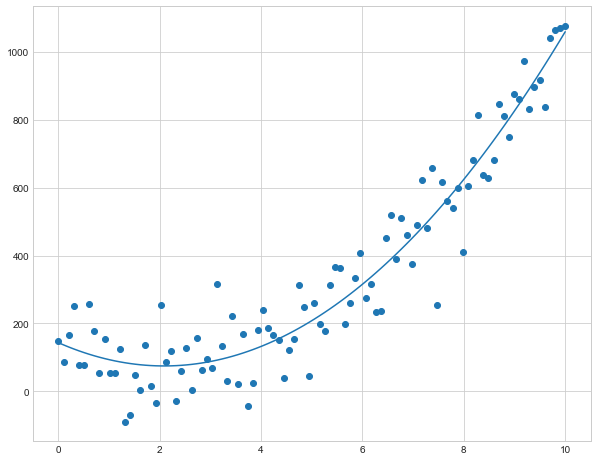

In [30]:
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, y_pred);
print(r2_score(y, y_pred))

***

# Boston Housing Dataset

In [13]:
df_boston = pd.read_csv('housing.data', delim_whitespace=True, header=None)
df_boston.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#sns.pairplot(df_boston, size=1.5);

In [14]:
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [15]:
X_boston = df_boston['DIS'].values
y_boston = df_boston['NOX'].values

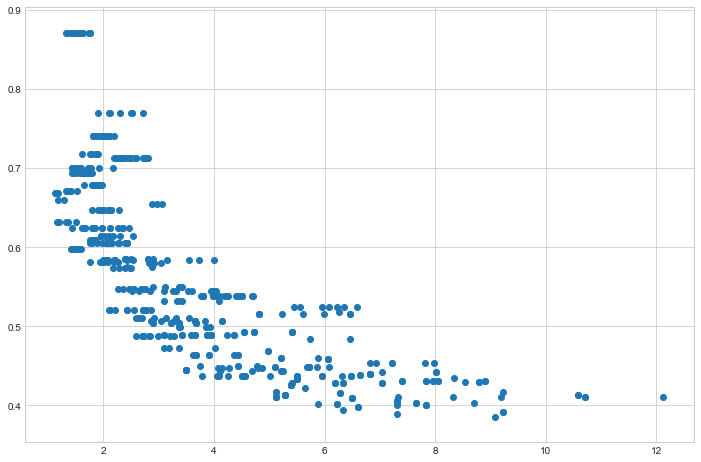

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston);

## Linear

R^2 score = 0.59


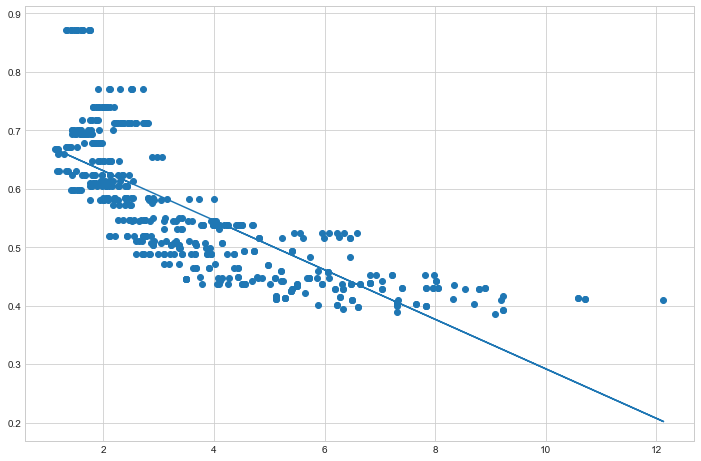

In [16]:
lr = LinearRegression()
lr.fit(X_boston.reshape(-1, 1), y_boston)
model_pred = lr.predict(X_boston.reshape(-1,1))
plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston);
plt.plot(X_boston, model_pred);
print("R^2 score = {:.2f}".format(r2_score(y_boston, model_pred)))

## Quadratic

In [17]:
poly_reg = PolynomialFeatures(degree=2)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1))
lin_reg_2 = LinearRegression()

In [18]:
lin_reg_2.fit(X_poly_b, y_boston)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]

In [20]:
X_fit

array([[  1.1296],
       [  2.1296],
       [  3.1296],
       [  4.1296],
       [  5.1296],
       [  6.1296],
       [  7.1296],
       [  8.1296],
       [  9.1296],
       [ 10.1296],
       [ 11.1296]])

In [21]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R^2 score = 0.70


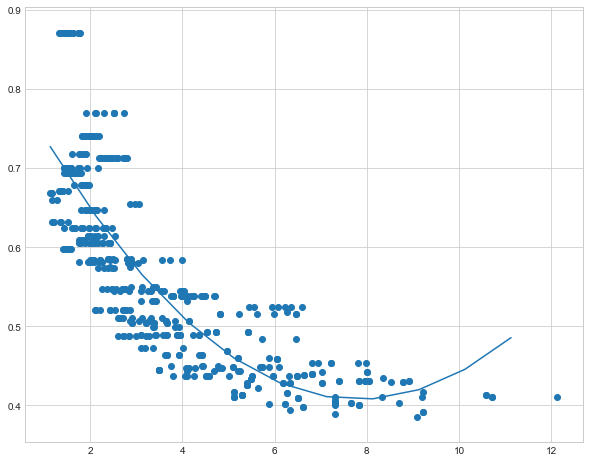

In [22]:
plt.figure(figsize=(10,8));
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, y_pred);
print("R^2 score = {:.2f}".format(r2_score(y_boston, 
                                          lin_reg_2.predict(X_poly_b))))

## Cubic

In [20]:
poly_reg = PolynomialFeatures(degree=3)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1))
lin_reg_3 = LinearRegression()

In [21]:
lin_reg_3.fit(X_poly_b, y_boston)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]

In [23]:
y_pred = lin_reg_3.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R^2 score = 0.71


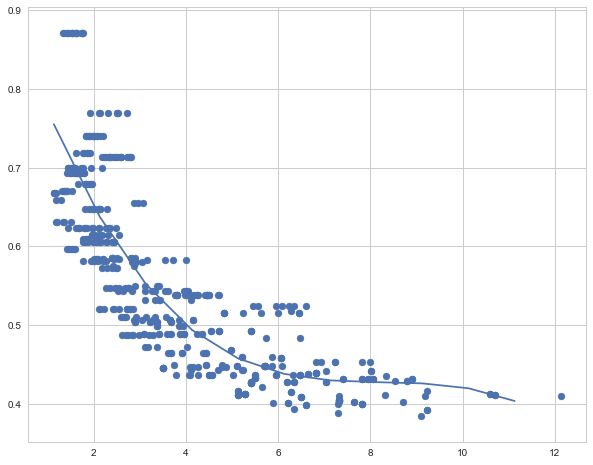

In [24]:
plt.figure(figsize=(10,8));
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, y_pred);
print("R^2 score = {:.2f}".format(r2_score(y_boston, 
                                          lin_reg_3.predict(X_poly_b))))

***